In [2]:
import numpy as np

In [5]:
data = np.loadtxt('data.csv',delimiter = ',')

In [7]:
x = data[:,0]
y = data[:,1]

In [9]:
# divide training and testing data
from sklearn import model_selection
x_train , x_test,y_train , y_test = model_selection.train_test_split(x,y,test_size = .3)

In [12]:
y_train.shape,x_train.shape

((70,), (70,))

In [17]:
def calculate_m_c(x_train,y_train):
    num = (x_train*y_train).mean() - x_train.mean()*y_train.mean()
    denum = (x_train**2).mean() - x_train.mean()**2
    m = num/denum
    c = y_train.mean() - m*x_train.mean()
    return m , c

In [14]:
def predict(x,m,c):
    return m*x + c

In [15]:
def score(y_actual,y_predict):
    u = ((y_actual - y_predict)**2).sum()
    v = ((y_actual-y_actual.mean())**2).sum()
    return 1-u/v

In [18]:
m , c = calculate_m_c(x_train,y_train)
y_predict = predict(x_test, m , c)
print('Test score : ', score(y_test,y_predict))
y_train_predict = predict(x_train, m , c)
print('Train score : ', score(y_train,y_train_predict))
print ("M =" , m)
print ("C =" , c)

Test score :  0.635578463826456
Train score :  0.5759685727053958
M = 1.3020439482977189
C = 8.6540922098269


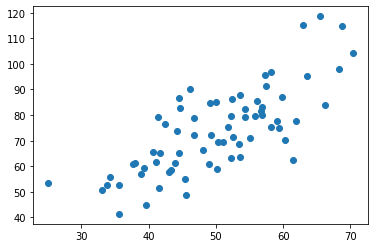

In [20]:
# training data visualization
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.show()

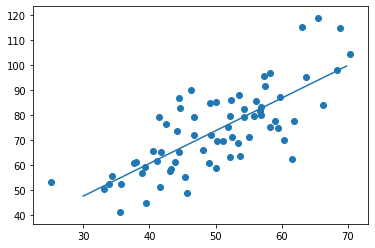

In [21]:
# comparing training data with best fit line that is calculated
x = np.arange(30,70,0.2)
y = m*x + c
plt.plot(x,y)
plt.scatter(x_train,y_train)
plt.show()

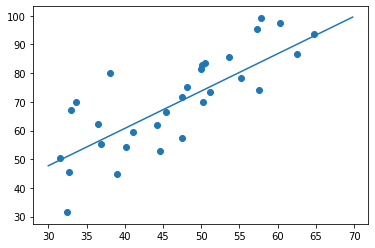

In [22]:
# comparing testing data with best fit line that is calculated
x = np.arange(30,70,0.2)
y = m*x + c
plt.plot(x,y)
plt.scatter(x_test,y_test)
plt.show()